In [36]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [37]:
data = pd.read_json('raw.chartblock.json')
data

,id,name,ticks,timeSpan
0,e60e8371-1037-56d1-8859-5b353ff9cb2e,bid,"[[1613480802018319, 0.056936999999999995], [16...",3600000000
1,9a13bcd4-695c-59a4-8713-e642721ef97d,ask,"[[1613480802018319, 0.056939], [16134808021060...",3600000000


In [38]:
t = np.array(data['ticks'][0]).T[0] # time
bid = np.array(data['ticks'][0]).T[1] # bid price
ask = np.array(data['ticks'][1]).T[1] # ask price

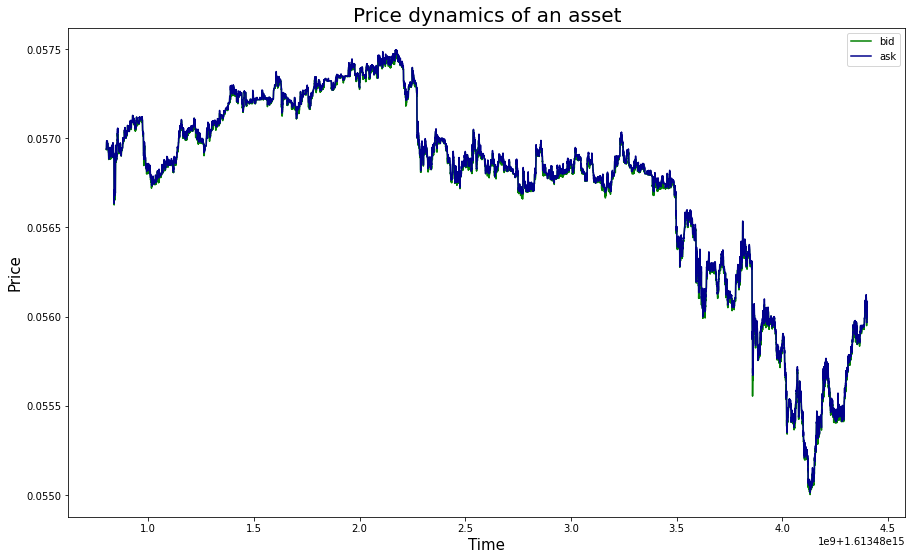

In [39]:
fig = plt.figure(figsize = (15, 9))

plt.plot(t, bid, label = 'bid', color = 'green', linewidth = 1.5)
plt.plot(t, ask, label = 'ask', color = 'darkblue', linewidth = 1.5)

plt.legend()
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price dynamics of an asset', fontsize = 20)

plt.show()

# Алгоритм

In [40]:
def trading(capital):
    """
    Алгоритм, который берет на вход стартовый капитал, а возвращает общий доход от торговли
    """
    max_asset_number = 0 # максимальное доступное кол-во актива
    account_res = 1 # остаток на счете
    for bid_p, ask_p in zip(bid, ask):
        # первый учет скачка цены
        if (max_asset_number < capital // ask_p) or (account_res < (capital - ask_p*max_asset_number)):
            max_asset_number = capital // ask_p
            account_res = capital % ask_p
        # второй учет скачка цены
        if capital < account_res + bid_p*max_asset_number: 
            capital = account_res + bid_p*max_asset_number
    return capital

In [41]:
print(format(trading(1), '.4f'))

1.5832
